In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
data1 = pd.read_csv('Viddyoze+Javascript+-+Page+Metadata+Bundled (1).csv')
data2= pd.read_csv('Viddyoze+Javascript+-+Page.csv')
data3= pd.read_csv('Viddyoze+Javascript+-+Identify+Metadata+Bundled.csv')

/Users/lemonipple/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
data1.shape

(2627360, 9)

In [68]:
data2.shape

(1546130, 33)

In [14]:
data3.shape

(2502718, 9)

In [4]:
data2.isnull().sum()

_sdc_batched_at                    0
_sdc_received_at                   0
_sdc_sequence                      0
_sdc_table_version                 0
anonymous_id                       0
channel                            0
context__ip                        0
context__library__name             0
context__library__version          0
context__page__path                0
context__page__title               0
dedupe_metadata__offset            0
message_id                         0
properties__path                   0
properties__title                  0
received_at                        0
sent_at                            0
timestamp                          0
type                               0
user_id                        75771
version                            0
properties__referrer           89174
context__page__referrer        89174
context__user_agent                0
context__page__url                 0
context__page__search        1532924
properties__url                    0
p

In [5]:
data2.head().T

,0,1,2,3,4
_sdc_batched_at,2017-11-24 14:20:30,2017-11-24 14:20:30,2017-11-24 14:20:30,2017-11-24 14:20:30,2017-11-24 14:20:30
_sdc_received_at,2017-11-24 14:20:20,2017-11-24 14:19:01,2017-11-24 14:19:26,2017-11-24 14:19:29,2017-11-24 14:19:08
_sdc_sequence,1.51153e+12,1.51153e+12,1.51153e+12,1.51153e+12,1.51153e+12
_sdc_table_version,0,0,0,0,0
anonymous_id,2ae0ae08-f3e7-467a-8550-422f6f82683c,c4dc444c-0bee-42f3-9445-19187491b752,16a939fd-4629-4ac3-8130-26be07d5b44d,7262c800-4697-4a2b-a36b-6ec5850e90de,c4dc444c-0bee-42f3-9445-19187491b752
channel,client,client,client,client,client
context__ip,175.137.41.111,92.247.171.164,190.240.55.183,108.181.142.63,92.247.171.164
context__library__name,analytics.js,analytics.js,analytics.js,analytics.js,analytics.js
context__library__version,3.2.5,3.2.5,3.2.5,3.2.5,3.2.5
context__page__path,/member/templates/category/alpha,/member/templates/category/intro/4,/member/renders,/member/renders/1510507,/member/templates/category/intro/5


In [6]:
import matplotlib.pyplot as plt

In [69]:
#frame = {'properties__url','user_id','context__ip'}
df = data2.loc[:,['_sdc_batched_at','properties__url','user_id','context__ip']]

In [70]:
df

,_sdc_batched_at,properties__url,user_id,context__ip
0,2017-11-24 14:20:30,https://app.viddyoze.com/member/templates/cate...,20471.0,175.137.41.111
1,2017-11-24 14:20:30,https://app.viddyoze.com/member/templates/cate...,31296.0,92.247.171.164
2,2017-11-24 14:20:30,https://app.viddyoze.com/member/renders,18531.0,190.240.55.183
3,2017-11-24 14:20:30,https://app.viddyoze.com/member/renders/1510507,56492.0,108.181.142.63
4,2017-11-24 14:20:30,https://app.viddyoze.com/member/templates/cate...,31296.0,92.247.171.164
5,2017-11-24 14:20:30,https://app.viddyoze.com/member/templates/cate...,31296.0,92.247.171.164
6,2017-11-24 14:20:30,https://app.viddyoze.com/member/templates/608/use,56055.0,82.107.93.9
7,2017-11-24 14:20:30,https://app.viddyoze.com/member/templates/cate...,2531.0,68.196.119.41
8,2017-11-24 14:20:30,https://app.viddyoze.com/member/renders/1510500,24030.0,79.32.208.100
9,2017-11-24 14:20:30,https://app.viddyoze.com/member/templates/cate...,60028.0,178.22.220.62


In [136]:
df2=df[df['properties__url'].str.match('https://app.viddyoze.com/member/templates/category')]
df2.shape

(417713, 4)

In [123]:
df1=df[df['properties__url'].str.match('https://app.viddyoze.com/')]
df1.shape

(1545904, 4)

In [137]:

df1
#df1.to_csv('df1.csv', index=False, header=None)
df2.to_csv('df2.csv', index=False, header=None)
#df3.to_csv('df3.csv', index=False, header=None)
#df4.to_csv('df4.csv', index=False, header=None)

In [128]:
df6=df[df['properties__url'].str.match('https://app.viddyoze.com/users/sign_in')]

df6.shape

(33380, 4)

In [126]:
df4=df[df['properties__url'].str.contains('download')]

df4.shape

(10451, 4)

In [125]:
df3=df[df['properties__url'].str.contains('rendering')]

df3.shape

(13568, 4)

In [127]:
df5=df[df['properties__url'].str.contains('https://app.viddyoze.com/purchase')]

df5.shape

(6224, 4)

In [59]:
e = data1['value'].unique()
result['value'].value_counts()

#obj2 = pd['value'][0].value_counts
#obj2
#outcome = obj2.value_counts
#outcome
#obj2
#e

Segment.io        3018769
Facebook Pixel    2111309
Name: value, dtype: int64

In [69]:
time_counts= result['_sdc_batched_at'].value_counts()


In [66]:
original_colnames1 = result.columns
original_colnames1

Index(['_sdc_batched_at', '_sdc_level_0_id', '_sdc_received_at',
       '_sdc_sequence', '_sdc_source_key_message_id', '_sdc_table_version',
       'value', '_BATCH_ID_', '_BATCH_LAST_RUN_'],
      dtype='object')

In [43]:
objects1= []
objects1

array(['Facebook Pixel', 'Segment.io'], dtype=object)

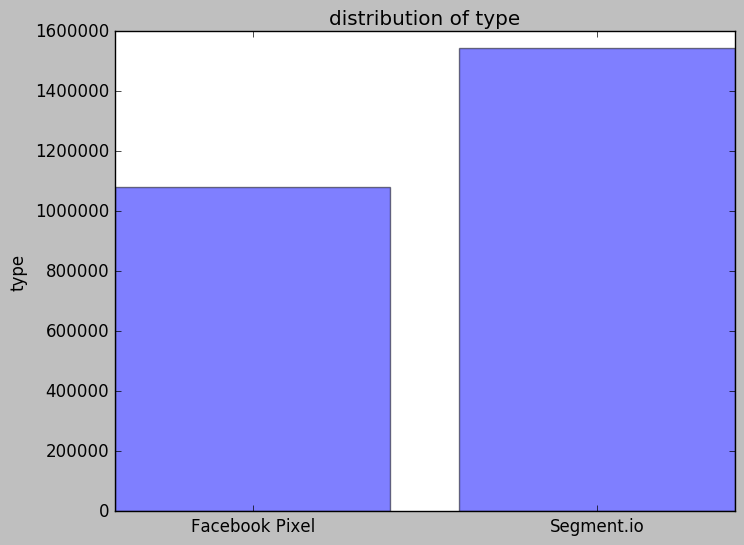

In [58]:
#graph

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = ('Facebook Pixel', 'Segment.io')
y_pos = np.arange(len(objects1))
performance = [1081230,1546130]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('type')
plt.title('distribution of type')
 
plt.show()


In [13]:
import pandas as pd
df = df.drop(['name'], axis = 1, inplace = True)
df


In [28]:
original_colnames1 = data1.columns
original_colnames1

Index(['_sdc_batched_at', '_sdc_level_0_id', '_sdc_received_at',
       '_sdc_sequence', '_sdc_source_key_message_id', '_sdc_table_version',
       'value', '_BATCH_ID_', '_BATCH_LAST_RUN_'],
      dtype='object')

In [29]:
original_colnames3 = data3.columns
original_colnames3

Index(['_sdc_batched_at', '_sdc_level_0_id', '_sdc_received_at',
       '_sdc_sequence', '_sdc_source_key_message_id', '_sdc_table_version',
       'value', '_BATCH_ID_', '_BATCH_LAST_RUN_'],
      dtype='object')

In [34]:
frames = [data1, data3]
result = pd.concat(frames)
result.drop_duplicates(['_sdc_batched_at', '_sdc_level_0_id', '_sdc_received_at',
       '_sdc_sequence', '_sdc_source_key_message_id', '_sdc_table_version',
       'value', '_BATCH_ID_', '_BATCH_LAST_RUN_'], keep= False)
result.shape

(5130078, 9)

In [37]:
frames1 = [data1,data3]
result1 = pd.concat(frames1)
result1.shape

(5130078, 9)

In [38]:
result.describe()

,_sdc_level_0_id,_sdc_sequence,_sdc_table_version,_BATCH_ID_
count,5.130078e+06,5.130078e+06,5130078.0,5130078.0
mean,4.115550e-01,1.514152e+12,0.0,50.0
std,4.921154e-01,1.635241e+09,0.0,0.0
min,0.000000e+00,1.511533e+12,0.0,50.0
25%,0.000000e+00,1.512886e+12,0.0,50.0
50%,0.000000e+00,1.513886e+12,0.0,50.0
75%,1.000000e+00,1.515369e+12,0.0,50.0
max,1.000000e+00,1.517845e+12,0.0,50.0
